In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv('covid_19_data.csv' ,parse_dates=['Last Update'])
data.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

#Print the top of the dataset
data.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [3]:
#the number of rows and columns
data.shape

(85638, 8)

In [4]:
#Missing Values
data.isnull().sum().to_frame('nulls')


,nulls
SNo,0
Date,0
Province/State,28297
Country,0
Last Update,0
Confirmed,0
Deaths,0
Recovered,0


Total Confirmed , Deaths and Recovered cases in the world 04/08/2020

In [5]:
df = data.groupby(["Date", "Country"])[['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
sorted_By_Confirmed=df.sort_values('Confirmed',ascending=False)
sorted_By_Confirmed=sorted_By_Confirmed.drop_duplicates('Country')

world_Confirmed_Total=sorted_By_Confirmed['Confirmed'].sum()
world_Deaths_Total=sorted_By_Confirmed['Deaths'].sum()
world_Recovered_Total=sorted_By_Confirmed['Recovered'].sum()

Active=world_Confirmed_Total-world_Deaths_Total-world_Recovered_Total

world_Deaths_rate=(world_Deaths_Total*100)/world_Confirmed_Total
world_Recovered_rate=(world_Recovered_Total*100)/world_Confirmed_Total

China=sorted_By_Confirmed[sorted_By_Confirmed['Country']=='Mainland China']
China_Recovered_rate=(int(China['Recovered'].values)*100)/int(China['Confirmed'].values)

veri={'Total Confirmed cases  in the world':world_Confirmed_Total,'Total Deaths cases in the world':world_Deaths_Total,'Total Recovered cases in the world':world_Recovered_Total,'Total Active Cases':Active,'Rate of Recovered Cases %':world_Recovered_rate,'Rate of Deaths Cases %':world_Deaths_rate,'Rate of Recovered China cases %':China_Recovered_rate}
veri=pd.DataFrame.from_dict(veri, orient='index' ,columns=['Total'])
print("04/08/2020") 
veri.style.background_gradient(cmap='Greens')

04/08/2020


,Total
Total Confirmed cases in the world,20621822.000000
Total Deaths cases in the world,749366.000000
Total Recovered cases in the world,12814592.000000
Total Active Cases,7057864.000000
Rate of Recovered Cases %,62.140930
Rate of Deaths Cases %,3.633850
Rate of Recovered China cases %,93.678324


Coron Virus With Numbers
Confirmed -- Cumulative number of confirmed cases till that date 

Deaths -- Cumulative number of of deaths till that date 

Recovered -- Cumulative number of recovered cases till that date 

Active -- Active Cases

Recovered Cases Rate % -- rate of Recovered Cases from total of Confirmed cases in same Country 

Deaths Cases Rate % -- rate of death Cases from total of Confirmed cases in same Country 

Total Cases Rate % -- rate of total cases from Total cases in the world

In [6]:
Recovered_rate=(sorted_By_Confirmed['Recovered']*100)/sorted_By_Confirmed['Confirmed']
Deaths_rate=(sorted_By_Confirmed['Deaths']*100)/sorted_By_Confirmed['Confirmed']
cases_rate=(sorted_By_Confirmed.Confirmed*100)/world_Confirmed_Total

sorted_By_Confirmed['Active']=sorted_By_Confirmed['Confirmed']-sorted_By_Confirmed['Deaths']-sorted_By_Confirmed['Recovered']
sorted_By_Confirmed['Recovered Cases Rate %']=pd.DataFrame(Recovered_rate)
sorted_By_Confirmed['Deaths Cases Rate %']=pd.DataFrame(Deaths_rate)
sorted_By_Confirmed['Total Cases Rate %']=pd.DataFrame(cases_rate)


print("Sorted By Confirmed Cases")
sorted_By_Confirmed.style.background_gradient(cmap='Reds')


Sorted By Confirmed Cases


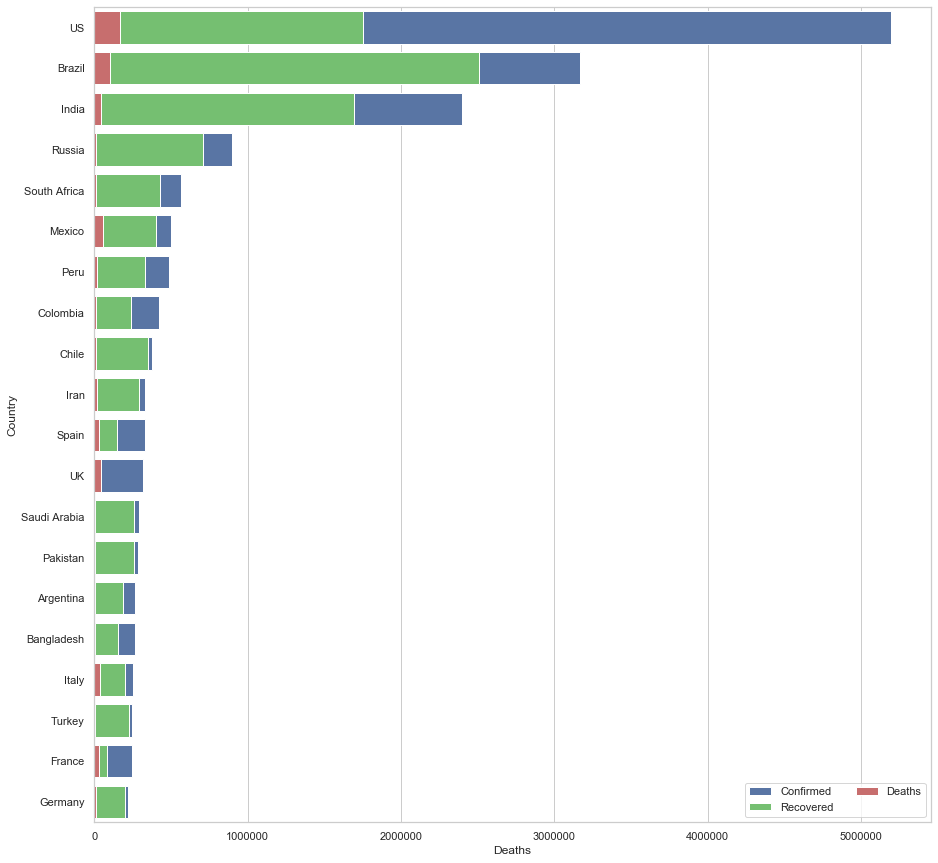

In [7]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15,15 ))

sns.barplot(x="Confirmed", y="Country", data=sorted_By_Confirmed.head(20),
            label="Confirmed", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Country", data=sorted_By_Confirmed.head(20),
            label="Recovered", color="g")

sns.set_color_codes("muted")
sns.barplot(x="Deaths", y="Country", data=sorted_By_Confirmed.head(20),
            label="Deaths", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)

What happened in one day ? (New cases | New Deaths ) - 04/08/2020
difference between 04/08/2020 and 04/07/2020

In [8]:
df_Difference = data.groupby(["Date", "Country"])[['Date', 'Country', 'Confirmed','Deaths']].sum().reset_index()
sorted_By_Confirmed_Difference=df_Difference.sort_values('Country',ascending=False)

x1=sorted_By_Confirmed_Difference[sorted_By_Confirmed_Difference.Date=='04/08/2020'].reset_index().drop('index',axis=1)
x2=sorted_By_Confirmed_Difference[sorted_By_Confirmed_Difference.Date=='04/07/2020'].reset_index().drop('index',axis=1)

h=pd.merge(x2,x1,on='Country')
h['New Confirmed Cases']=h['Confirmed_y']-h['Confirmed_x']
h['New Deaths ']=h['Deaths_y']-h['Deaths_x']

h1=h.sort_values('New Confirmed Cases',ascending=False).head(50)
h1=h1.drop(['Confirmed_x','Deaths_x','Date_x','Confirmed_y','Deaths_y'],axis=1).style.background_gradient(cmap='Greens')
print("The New Cases in 08/04")
h1

The New Cases in 08/04


,Country,Date_y,New Confirmed Cases,New Deaths
11,US,04/08/2020,32829.000000,1973.000000
27,Spain,04/08/2020,6278.000000,747.000000
122,Germany,04/08/2020,5633.000000,333.000000
12,UK,04/08/2020,5525.000000,940.000000
13,Turkey,04/08/2020,4117.000000,87.000000
126,France,04/08/2020,3894.000000,544.000000
102,Italy,04/08/2020,3836.000000,542.000000
162,Brazil,04/08/2020,2136.000000,133.000000
106,Iran,04/08/2020,1997.000000,121.000000
52,Peru,04/08/2020,1388.000000,14.000000


Top 10 infected Countries

Text(0.5, 1.0, 'Total Cases / Deaths / Recovered')

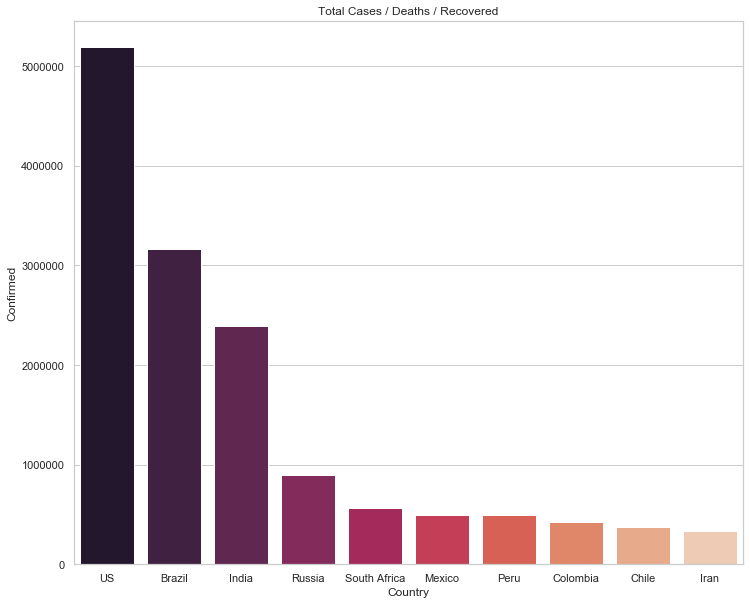

In [9]:
sorted_By_Confirmed1=sorted_By_Confirmed.head(10)
x=sorted_By_Confirmed1.Country
y=sorted_By_Confirmed1.Confirmed
plt.rcParams['figure.figsize'] = (12, 10)
sns.barplot(x,y,order=x ,palette="rocket").set_title('Total Cases / Deaths / Recovered')  #graf çizdir (Most popular)

Cases Rate per country of total cases in the world

cases rate per country of total cases in the world 


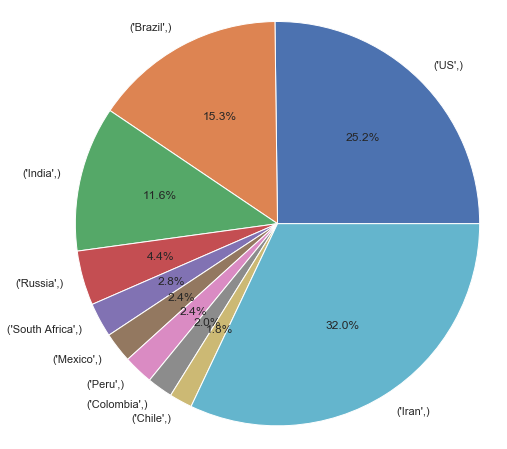

In [10]:
Top7=sorted_By_Confirmed.iloc[0:9,-1].values
others=sorted_By_Confirmed.iloc[9:,-1].sum()
x=np.array(Top7)
x2=np.array(others)
rates=np.concatenate((x, x2), axis=None)

rate_perCountry=pd.DataFrame(data=rates,index=[sorted_By_Confirmed['Country'].head(10)] ,columns=['rate'])
rate_perCountry.rename(index={'Belgium': "other Countries"},inplace=True)


labels=rate_perCountry.index
sizes=rate_perCountry['rate'].values

explode = None  # explode 1st slice
plt.subplots(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=False, startangle=0)
plt.axis('equal')
print("cases rate per country of total cases in the world ")
plt.show()

Graphic that illustrates Increasing infections cases per day

C:\Users\softech\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


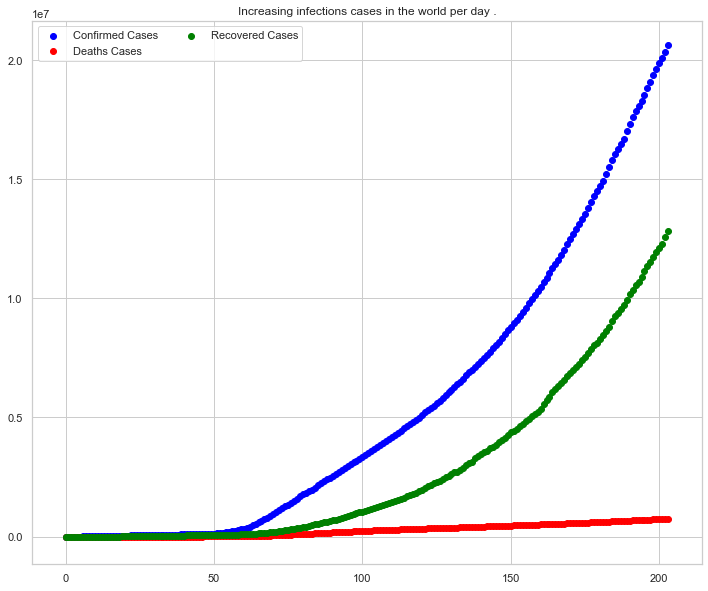

In [11]:
cases_per_Day = data.groupby(["Date"])['Confirmed','Deaths', 'Recovered'].sum().reset_index()
sorted_By_Confirmed1=cases_per_Day.sort_values('Date',ascending=False)

x=cases_per_Day.index

y=cases_per_Day.Confirmed
y1=cases_per_Day.Deaths
y2=cases_per_Day.Recovered

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12,10 ))

plt.scatter(x,y,color='blue' , label='Confirmed Cases')
plt.scatter(x,y1,color='red' ,label="Deaths Cases")
plt.scatter(x,y2,color='green',label="Recovered Cases")
plt.title("Increasing infections cases in the world per day .")
ax.legend(ncol=2, loc='upper left', frameon=True)
plt.show()

Table that illustrates Increasing infections cases in the world per day

In [14]:
sorted_By_Confirmed1.style.background_gradient(cmap='Blues')

,Date,Confirmed,Deaths,Recovered
203,08/12/2020,20620847.000000,749358.000000,12826815.000000
202,08/11/2020,20343589.000000,742615.000000,12585473.000000
201,08/10/2020,20089624.000000,736191.000000,12280520.000000
200,08/09/2020,19861683.000000,731326.000000,12115825.000000
199,08/08/2020,19637506.000000,726781.000000,11939109.000000
198,08/07/2020,19378036.000000,721324.000000,11737927.000000
197,08/06/2020,19097149.000000,714940.000000,11545401.000000
196,08/05/2020,18811953.000000,707820.000000,11356275.000000
195,08/04/2020,18540789.000000,700736.000000,11134735.000000
194,08/03/2020,18282208.000000,693694.000000,10913000.000000


Prediction Future cases

In [15]:
#Train & Test Data 
x_data=pd.DataFrame(cases_per_Day.index)
y_data=pd.DataFrame(cases_per_Day.Confirmed)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1,random_state=0)

Polynomial Regression to predict future cases

In [17]:
#Polynomal Regression (degree=5)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=5)
x_poly=poly_reg.fit_transform(x_train)
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Graphic

C:\Users\softech\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


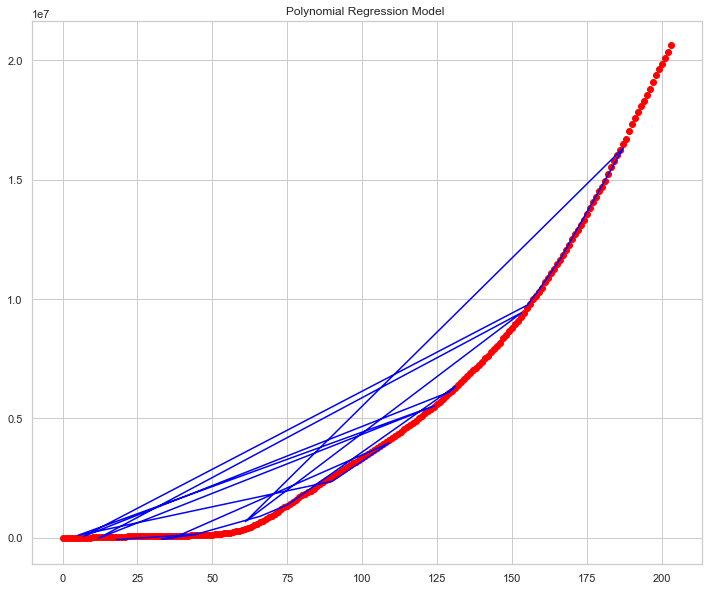

In [18]:
cases_per_Day = data.groupby(["Date"])['Confirmed','Deaths', 'Recovered'].sum().reset_index()
sorted_By_Confirmed1=cases_per_Day.sort_values('Date',ascending=False)

x=cases_per_Day.index

y=cases_per_Day.Confirmed

plt.scatter(x,y,color='red')
plt.plot(x_test,lin_reg2.predict(poly_reg.fit_transform(x_test)),color='blue')
plt.title("Polynomial Regression Model ")
plt.show()


In [19]:
#Testing the algorithm

y_pred=lin_reg2.predict(poly_reg.fit_transform(x_test))

result=pd.DataFrame(y_pred)
result['Real Value']=y_test.iloc[:,:].values
result['Predicted Value']=pd.DataFrame(y_pred)
result=result[['Real Value','Predicted Value']]
result

,Real Value,Predicted Value
0,40151.0,-7.566961e+04
1,105836.0,1.499877e+05
2,79570.0,-5.260117e+04
3,84124.0,-3.586535e+03
4,4101699.0,3.971401e+06
5,2549123.0,2.369754e+06
6,2927.0,9.509197e+04
7,5495061.0,5.525046e+06
8,19881.0,-1.731013e+04
9,9263466.0,9.421361e+06


In [20]:
from sklearn.metrics import r2_score

print('Polynomial Regession  R2 Score   : ',r2_score(y_test, y_pred))

Polynomial Regession  R2 Score   :  0.9992767890076609


Prediction for future

In [21]:
#today is 03/29/2020
print("After {0} day will be {1} case in the world".format((88-len(cases_per_Day)),lin_reg2.predict(poly_reg.fit_transform([[88]]))))
print("After {0} day will be {1} case in the world".format((98-len(cases_per_Day)),lin_reg2.predict(poly_reg.fit_transform([[98]]))))
print("After {0} day will be {1} case in the world".format((108-len(cases_per_Day)),lin_reg2.predict(poly_reg.fit_transform([[108]]))))

After -116 day will be [[2223854.40804436]] case in the world
After -106 day will be [[2996293.97969538]] case in the world
After -96 day will be [[3877207.95281055]] case in the world


In [25]:
from sklearn.externals import joblib
joblib.dump(poly_reg,'Covid_19.pkl')


['Covid_19.pkl']